In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
data = pd.read_csv('titanic_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Features and Target Selection

In [5]:
X = data.drop('Survived',axis = 1)
y = data['Survived']

In [6]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_y,valid_y = train_test_split(X,y,random_state = 101, stratify = y, test_size = 0.25)

In [7]:
train_y.value_counts(normalize = True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [8]:
valid_y.value_counts(normalize = True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [9]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 10)

In [10]:
#fitting model
dt.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [11]:
dt.score(train_X,train_y)

0.9880239520958084

In [12]:
dt.score(valid_X,valid_y)

0.7533632286995515

In [13]:
dt.predict(valid_X)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

**We will try changing threshold of surivival from default 0.5**

In [14]:
pred_y = dt.predict_proba(valid_X)[:,1]
#[:,1] is for selecting the 2nd column returned by predict_proba function i.e. probability of class 1

In [15]:
new_pred_y = []
for i in range(len(pred_y)):
    if pred_y[i] < 0.6:
        new_pred_y.append(0)
    else:
        new_pred_y.append(1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y,new_pred_y)

0.7533632286995515

## Deciding Max depth of tree

In [17]:
md_train_accuracy = []
md_valid_accuracy = []
for depth in range(1,10):
    dt = DecisionTreeClassifier(max_depth = depth,random_state = 10)
    dt.fit(train_X,train_y)
    md_train_accuracy.append(dt.score(train_X,train_y))
    md_valid_accuracy.append(dt.score(valid_X,valid_y))

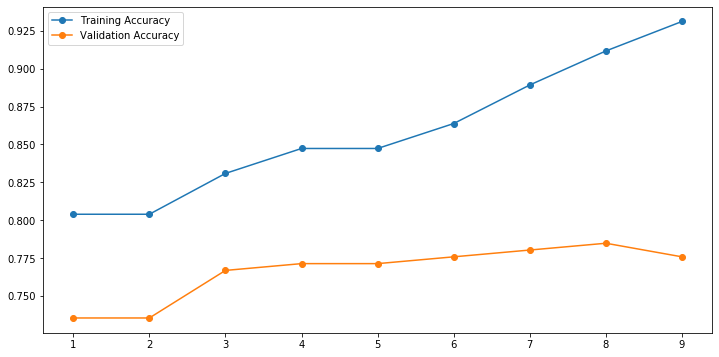

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),md_train_accuracy, label = 'Training Accuracy', marker = 'o')
plt.plot(range(1,10),md_valid_accuracy, label = 'Validation Accuracy', marker = 'o')
plt.legend()
plt.show()

**Our priority is increasing accuracy in validation stage**  
From above figure max depth of 8 for validation plot is maximum, also the training score for 8 is good

## Deciding Max leaf nodes

In [19]:
mln_train_accuracy = []
mln_valid_accuracy = []
for nodes in range(2,30):
    dt = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = nodes,random_state = 10)
    dt.fit(train_X,train_y)
    mln_train_accuracy.append(dt.score(train_X,train_y))
    mln_valid_accuracy.append(dt.score(valid_X,valid_y))

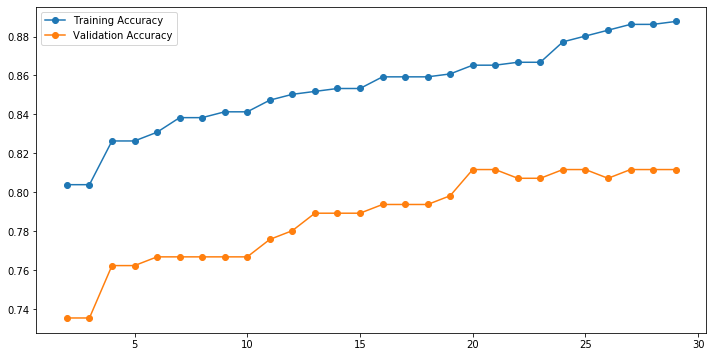

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(2,30),mln_train_accuracy, label = 'Training Accuracy', marker = 'o')
plt.plot(range(2,30),mln_valid_accuracy, label = 'Validation Accuracy', marker = 'o')
plt.legend()
plt.show()

**20 is giving maximum accuracy in validation plot**

## Plotting our decision tree with optimal amount of leaf nodes and depth

In [21]:
dt = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 20, random_state = 10)

In [22]:
dt.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [23]:
dt.score(train_X,train_y)

0.8652694610778443

In [24]:
dt.score(valid_X,valid_y)

0.8116591928251121

# Visualizing decision tree

In [27]:
from sklearn import tree

In [28]:
decision_tree = tree.export_graphviz(dt,out_file = 'tree.dot', feature_names = train_X.columns, max_depth = 3, filled = 3)

In [29]:
!dot -Tpng tree.dot -o tree.png

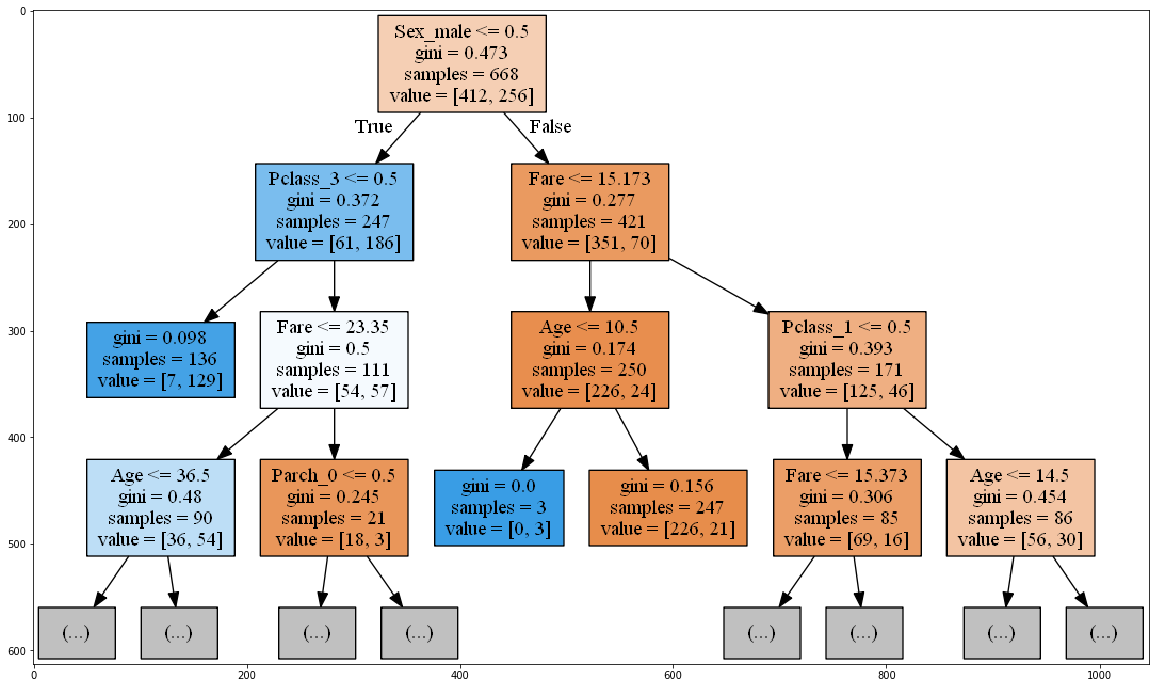

In [31]:
image = plt.imread('tree.png')
plt.figure(figsize = (20,20))
plt.imshow(image)